# 1. Notebook Setup & Data Loading

1.1 Environment Setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print("Environment ready")

Environment ready


1.2 Upload Dataset


In [2]:
from google.colab import files

uploaded = files.upload()

Saving DataSet17Dec2025.xlsx to DataSet17Dec2025.xlsx
Saving FieldDesc.xlsx to FieldDesc.xlsx


1.3 Load the Data

In [4]:
# Load main dataset
df = pd.read_excel("DataSet17Dec2025.xlsx")

# Load field description
field_desc = pd.read_excel("FieldDesc.xlsx")

print("Main Dataset Shape:", df.shape)
print("Field Description Shape:", field_desc.shape)

Main Dataset Shape: (17511, 28)
Field Description Shape: (27, 2)


1.4 First Look at Data

In [5]:
# Preview first 5 rows
df.head()

,ACCT_OPN_DATE,SCHM_TYPE,SANCT_LIM,COLLATERAL_TYPE,LOAN_TENURE_MONTHS,REP_FREQ,INTTRATE,PREPAYMENT_HIST,OVD_AMT,CUST_DOB,MONTHLY_AVG_DEP,FD_AMT,MONTHLY_AVG_CR_AMT,MONTHLY_AVG_DR_AMT,MONTHLY_NO_OF_TXNS,DISTRICT,PROVINCE,PROFESSION,RISK_RATING,DORMANT_STATUS,NO_OF_QR_TXNS,NO_OF_POS_TXNS,FONELOAN_OS,CC_OS,MAPPED_FORACID,MAPPED_CIF_ID,MAPPED_OP_AC,AS_ON
0,2022-12-12,LAA,750000.00,Immovable Property,120.0,M,7.75,N,0.00,1990-12-06,2738.07,NaN,9400.0,9399.0,2.0,TANAHU,PROVINCE 4,NaN,LOW,A,NaN,NaN,NaN,NaN,AGG06M8CCAAAACI,RAIBBFJBAF,AGGBBAAFCDI,2025-11-30
1,2021-01-31,LAA,74601.87,NaN,71.0,M,8.50,N,362.93,1970-02-12,459.41,NaN,NaN,1060.0,1.0,CHITWAN,PROVINCE 3,AGRICULTURAL PROFESSION,LOW,A,NaN,NaN,NaN,NaN,AGG06M8CBAAAABJ,RAIAEIJEGG,AGGCAAACDIF,2025-11-30
2,2021-03-21,LAA,1500000.00,Immovable Property,120.0,M,7.75,N,17825.24,1980-02-24,0.00,NaN,19500.0,19500.0,2.0,ARGHAKHANCHI,PROVINCE 5,NaN,LOW,A,NaN,NaN,NaN,NaN,AGG06M8CBAAAAEG,RAIAIEBIED,AGGBBAAECEI,2025-11-30
3,2021-09-27,LAA,700000.00,Immovable Property,120.0,M,7.75,Y,0.00,1986-09-28,4152.26,NaN,30000.0,15349.0,3.0,LAMJUNG,PROVINCE 4,NaN,LOW,A,NaN,NaN,NaN,NaN,AGG06M8CBAAAAGE,RAIAJFHIBA,AGGBBAAEFIF,2025-11-30
4,2023-03-20,LAA,1000000.00,NaN,120.0,M,2.75,N,0.00,1974-05-19,3841.98,NaN,11000.0,9967.0,2.0,CHITWAN,PROVINCE 3,NaN,LOW,A,NaN,NaN,NaN,NaN,AGG06M8CDAAAABJ,RAIBBJHFAF,AGGHBAAAAGA,2025-11-30


1.5 Column Overview

In [6]:
# Column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17511 entries, 0 to 17510
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ACCT_OPN_DATE       17511 non-null  datetime64[ns]
 1   SCHM_TYPE           17511 non-null  object        
 2   SANCT_LIM           17511 non-null  float64       
 3   COLLATERAL_TYPE     1275 non-null   object        
 4   LOAN_TENURE_MONTHS  7062 non-null   float64       
 5   REP_FREQ            7062 non-null   object        
 6   INTTRATE            17511 non-null  float64       
 7   PREPAYMENT_HIST     17511 non-null  object        
 8   OVD_AMT             6875 non-null   float64       
 9   CUST_DOB            17511 non-null  datetime64[ns]
 10  MONTHLY_AVG_DEP     17511 non-null  float64       
 11  FD_AMT              360 non-null    float64       
 12  MONTHLY_AVG_CR_AMT  6502 non-null   float64       
 13  MONTHLY_AVG_DR_AMT  7254 non-null   float64   

1.6 Field Description Preview

In [7]:
field_desc.head(10)

,ACCT_OPN_DATE,Account opened date
0,SCHM_TYPE,Scheme type
1,SANCT_LIM,Sanctioned limit
2,COLLATERAL_TYPE,Collateral type
3,LOAN_TENURE_MONTHS,Loan tenure in months
4,REP_FREQ,Repayment Frequency
5,INTTRATE,Interest rate
6,PREPAYMENT_HIST,prepayment history
7,OVD_AMT,overdue amount
8,CUST_DOB,customer's date of birth
9,MONTHLY_AVG_DEP,monthly average deposit of operative account


# 2. Dataset Understanding & Feature Categorization

2.1 Create Feature Groups (Manual + Explicit)

In [15]:
# ===============================
# Feature Categorization
# ===============================

identifier_cols = [
    'MAPPED_FORACID',
    'MAPPED_CIF_ID',
    'MAPPED_OP_AC'
]

date_cols = [
    'ACCT_OPN_DATE',
    'CUST_DOB',
    'AS_ON'
]

numerical_cols = [
    'SANCT_LIM',
    'INTTRATE',
    'OVD_AMT',
    'MONTHLY_AVG_DEP',
    'FD_AMT',
    'MONTHLY_AVG_CR_AMT',
    'MONTHLY_AVG_DR_AMT',
    'MONTHLY_NO_OF_TXNS',
    'NO_OF_QR_TXNS',
    'NO_OF_POS_TXNS',
    'FONELOAN_OS',
    'CC_OS',
    'LOAN_TENURE_MONTHS'
]

categorical_cols = [
    'SCHM_TYPE',
    'COLLATERAL_TYPE',
    'REP_FREQ',
    'PREPAYMENT_HIST',
    'DISTRICT',
    'PROVINCE',
    'PROFESSION',
    'RISK_RATING',
    'DORMANT_STATUS'
]

print("Identifier columns:", identifier_cols)
print("Date columns:", date_cols)
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Identifier columns: ['MAPPED_FORACID', 'MAPPED_CIF_ID', 'MAPPED_OP_AC']
Date columns: ['ACCT_OPN_DATE', 'CUST_DOB', 'AS_ON']
Numerical columns: ['SANCT_LIM', 'INTTRATE', 'OVD_AMT', 'MONTHLY_AVG_DEP', 'FD_AMT', 'MONTHLY_AVG_CR_AMT', 'MONTHLY_AVG_DR_AMT', 'MONTHLY_NO_OF_TXNS', 'NO_OF_QR_TXNS', 'NO_OF_POS_TXNS', 'FONELOAN_OS', 'CC_OS', 'LOAN_TENURE_MONTHS']
Categorical columns: ['SCHM_TYPE', 'COLLATERAL_TYPE', 'REP_FREQ', 'PREPAYMENT_HIST', 'DISTRICT', 'PROVINCE', 'PROFESSION', 'RISK_RATING', 'DORMANT_STATUS']


2.2 Sanity Check (NO column left behind)

In [16]:
# Check if all columns are accounted for
all_listed_cols = (
    identifier_cols +
    date_cols +
    numerical_cols +
    categorical_cols
)

missing_cols = set(df.columns) - set(all_listed_cols)

print("Columns not categorized:", missing_cols)

Columns not categorized: set()


## Dataset Overview

This dataset represents retail banking customers with loan-related attributes,
transaction behavior, demographic indicators, and risk markers.

### Key Feature Groups:
- **Identifier Columns**: Internal banking identifiers (excluded from modeling)
- **Date Columns**: Used for feature engineering (age, account vintage)
- **Numerical Features**: Financial limits, balances, transaction behavior
- **Categorical Features**: Scheme type, profession, geography, risk rating

The dataset contains intentional missingness in several behavioral variables,
which may itself carry predictive information and will be handled carefully
in subsequent steps.


# 3. Data Quality Audit (Missingness, Duplicates & Banking Sanity)

3.1 Missing Value Summary

In [10]:
# ===============================
# Missing Value Analysis
# ===============================

missing_summary = (
    df.isnull()
      .sum()
      .to_frame(name='Missing_Count')
      .assign(Missing_Percentage=lambda x: (x['Missing_Count'] / len(df)) * 100)
      .sort_values('Missing_Percentage', ascending=False)
)

missing_summary


,Missing_Count,Missing_Percentage
NO_OF_POS_TXNS,17432,99.548855
FONELOAN_OS,17409,99.417509
FD_AMT,17151,97.944149
NO_OF_QR_TXNS,17004,97.104677
CC_OS,16668,95.185883
COLLATERAL_TYPE,16236,92.718862
MONTHLY_AVG_CR_AMT,11009,62.869054
OVD_AMT,10636,60.738964
REP_FREQ,10449,59.671064
LOAN_TENURE_MONTHS,10449,59.671064


3.2 Visualize Missingness (Top 15)

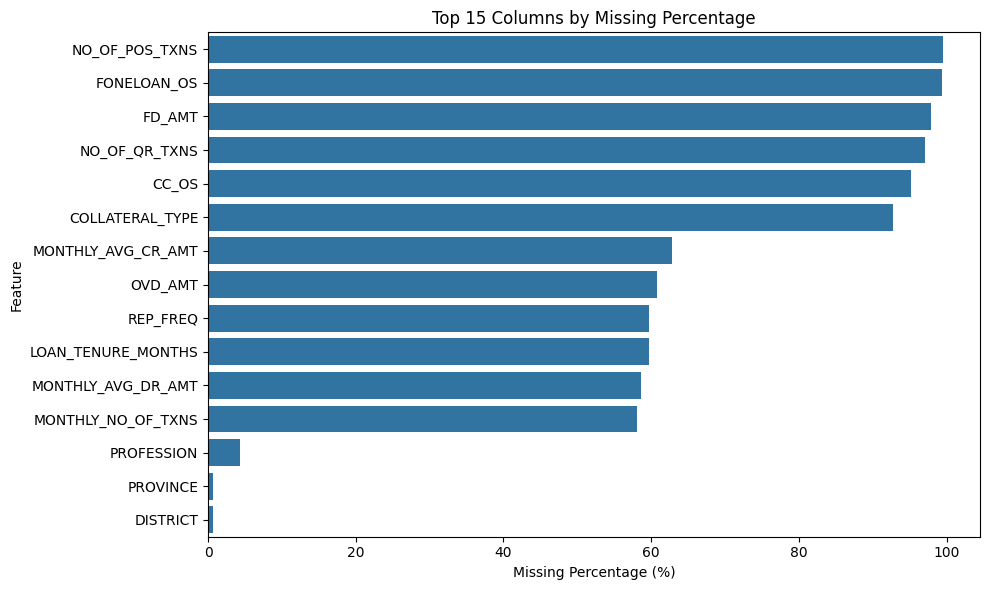

In [11]:
# Plot top 15 columns by missing percentage
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_summary.head(15)['Missing_Percentage'],
    y=missing_summary.head(15).index
)
plt.title("Top 15 Columns by Missing Percentage")
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


3.3 Duplicate Record Check

In [12]:
# ===============================
# Duplicate Check
# ===============================

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


3.4 Key Banking Sanity Checks

In [13]:
# ===============================
# Banking Sanity Checks
# ===============================

print("Negative values check:")

for col in numerical_cols:
    if (df[col].dropna() < 0).any():
        print(f"⚠️ Negative values found in {col}")


Negative values check:
⚠️ Negative values found in INTTRATE
⚠️ Negative values found in OVD_AMT
⚠️ Negative values found in MONTHLY_AVG_DEP
⚠️ Negative values found in CC_OS


3.5 High-Missing Columns Flag (Programmatic)

In [14]:
high_missing_cols = missing_summary[
    missing_summary['Missing_Percentage'] > 80
].index.tolist()

print("Columns with >80% missing values:")
high_missing_cols


Columns with >80% missing values:


['NO_OF_POS_TXNS',
 'FONELOAN_OS',
 'FD_AMT',
 'NO_OF_QR_TXNS',
 'CC_OS',
 'COLLATERAL_TYPE']

## Data Quality Observations

- Several behavioral features exhibit high missingness, which is expected in retail banking datasets.
- Missing values likely indicate **non-usage of specific banking products** rather than data errors.
- No corrective action is taken at this stage; missingness will be treated as informative in later steps.
- Data duplication and negative-value checks are performed to ensure structural integrity.


# 4. Target Variable Definition (Loan Uptake Logic)

4.1 Create Target Variable

In [58]:
# ===============================
# Target Variable: Loan Uptake
# ===============================

df['LOAN_UPTAKE'] = np.where(
    (df['SANCT_LIM'] > 0) |
    (df['FONELOAN_OS'].fillna(0) > 0) |
    (df['CC_OS'].fillna(0) > 0),
    1,
    0
)


4.2 Target Distribution Check

In [59]:
# Distribution of target variable
df['LOAN_UPTAKE'].value_counts(normalize=True) * 100


,proportion
LOAN_UPTAKE,
0,58.043516
1,41.956484


4.3 Sanity Check (Random Sample)

In [60]:
# Inspect a few records
df[['SANCT_LIM', 'FONELOAN_OS', 'CC_OS', 'LOAN_UPTAKE']].sample(10, random_state=42)


,SANCT_LIM,FONELOAN_OS,CC_OS,LOAN_UPTAKE
6757,1800000.00,0.0,0.00,1
13147,2200000.00,0.0,0.00,1
6355,400000.00,0.0,0.00,1
14195,0.00,0.0,0.00,0
10727,0.00,0.0,0.00,0
16104,0.00,0.0,0.00,0
16169,0.00,0.0,0.00,0
8045,0.00,0.0,0.00,0
937,5000000.00,0.0,0.00,1
123,259935.42,0.0,259935.42,1


## Target Variable Definition: Loan Uptake

Loan uptake is defined as the presence of any active loan exposure.

A customer is considered to have loan uptake (`LOAN_UPTAKE = 1`) if:
- Sanctioned loan limit is greater than zero, OR
- Outstanding fhone loan balance exists, OR
- Outstanding credit card balance exists.

This approach reflects real-world banking practice where loan ownership
is inferred from active credit exposure rather than explicit labels.


# 5. Missing Value Strategy

5.1 Create Missing Indicators

In [20]:
# ===============================
# Missingness Indicator Features
# ===============================

missing_indicator_cols = [
    'NO_OF_QR_TXNS',
    'NO_OF_POS_TXNS',
    'FD_AMT',
    'CC_OS',
    'FONELOAN_OS',
    'MONTHLY_AVG_CR_AMT',
    'MONTHLY_AVG_DR_AMT',
    'MONTHLY_NO_OF_TXNS',
    'OVD_AMT',
    'LOAN_TENURE_MONTHS',
    'REP_FREQ',
    'COLLATERAL_TYPE'
]

for col in missing_indicator_cols:
    df[f'{col}_MISSING'] = df[col].isnull().astype(int)

# Check indicators
df[[f'{col}_MISSING' for col in missing_indicator_cols]].sum()


,0
NO_OF_QR_TXNS_MISSING,17004
NO_OF_POS_TXNS_MISSING,17432
FD_AMT_MISSING,17151
CC_OS_MISSING,16668
FONELOAN_OS_MISSING,17409
MONTHLY_AVG_CR_AMT_MISSING,11009
MONTHLY_AVG_DR_AMT_MISSING,10257
MONTHLY_NO_OF_TXNS_MISSING,10160
OVD_AMT_MISSING,10636
LOAN_TENURE_MONTHS_MISSING,10449


5.2 Impute Numerical Columns

In [23]:
# ===============================
# Numerical Missing Value Imputation
# ===============================

numerical_impute_cols = [
    'NO_OF_QR_TXNS',
    'NO_OF_POS_TXNS',
    'FD_AMT',
    'CC_OS',
    'FONELOAN_OS',
    'MONTHLY_AVG_CR_AMT',
    'MONTHLY_AVG_DR_AMT',
    'MONTHLY_NO_OF_TXNS',
    'OVD_AMT',
    'LOAN_TENURE_MONTHS'
]

df[numerical_impute_cols] = df[numerical_impute_cols].fillna(0)


5.3 Impute Categorical Columns

In [24]:
# ===============================
# Categorical Missing Value Imputation
# ===============================

categorical_impute_cols = [
    'REP_FREQ',
    'COLLATERAL_TYPE'
]

df[categorical_impute_cols] = df[categorical_impute_cols].fillna('None')


5.4 Validation Check

In [25]:
# Confirm no missing values remain in modeling features
df[numerical_impute_cols + categorical_impute_cols].isnull().sum()


,0
NO_OF_QR_TXNS,0
NO_OF_POS_TXNS,0
FD_AMT,0
CC_OS,0
FONELOAN_OS,0
MONTHLY_AVG_CR_AMT,0
MONTHLY_AVG_DR_AMT,0
MONTHLY_NO_OF_TXNS,0
OVD_AMT,0
LOAN_TENURE_MONTHS,0


## Missing Value Treatment Strategy

Missing values in this dataset primarily represent non-usage of specific
banking products rather than data quality issues.

To preserve this information:
- Missingness indicators were created for key behavioral variables.
- Numerical missing values were imputed with zero to represent absence of activity.
- Categorical missing values were labeled as "None" to retain semantic meaning.

This dual approach ensures that both the absence of a feature and its
informational impact are captured by the model.


# 6. Feature Engineering

6.1 Customer Age (in years)

In [26]:
# ===============================
# Feature Engineering: Age
# ===============================

df['AGE'] = (
    (df['AS_ON'] - df['CUST_DOB']).dt.days / 365.25
).astype(int)

df['AGE'].describe()


,AGE
count,17511.00000
mean,46.12455
std,15.23866
min,8.00000
25%,37.00000
50%,44.00000
75%,53.00000
max,125.00000


6.2 Account Vintage (in months)

In [27]:
# ===============================
# Feature Engineering: Account Vintage
# ===============================

df['ACCOUNT_VINTAGE_MONTHS'] = (
    (df['AS_ON'] - df['ACCT_OPN_DATE']).dt.days / 30
).astype(int)

df['ACCOUNT_VINTAGE_MONTHS'].describe()


,ACCOUNT_VINTAGE_MONTHS
count,17511.000000
mean,62.518588
std,46.633407
min,-2.000000
25%,29.000000
50%,54.000000
75%,87.000000
max,219.000000


6.3 Risk Rating Bucketing

In [28]:
# ===============================
# Risk Rating Buckets
# ===============================

df['RISK_BUCKET'] = df['RISK_RATING'].map({
    'LOW': 'Low',
    'MEDIUM': 'Medium',
    'HIGH': 'High'
}).fillna('Unknown')

df['RISK_BUCKET'].value_counts()


,count
RISK_BUCKET,
Low,16320
Unknown,1191


6.4 Optional Behavioral Flags

In [29]:
# ===============================
# Behavioral Flags
# ===============================

df['HAS_QR_USAGE'] = (df['NO_OF_QR_TXNS'] > 0).astype(int)
df['HAS_POS_USAGE'] = (df['NO_OF_POS_TXNS'] > 0).astype(int)
df['HAS_FD'] = (df['FD_AMT'] > 0).astype(int)
df['HAS_CC'] = (df['CC_OS'] > 0).astype(int)


## Feature Engineering

Additional features were engineered to enhance model interpretability
and predictive power:

- **Age**: Derived from date of birth
- **Account Vintage**: Duration of customer relationship with the bank
- **Risk Buckets**: Simplified credit risk categorization
- **Behavioral Flags**: Indicators of product usage and transaction behavior

These engineered features reflect real-world banking decision factors.


# 7. Data Cleansing Rules

7.1 Age Validation & Correction

In [30]:
# ===============================
# Age Cleaning
# ===============================

# Define valid age range for retail banking
MIN_AGE = 18
MAX_AGE = 100

df['AGE_CLEAN'] = df['AGE'].clip(lower=MIN_AGE, upper=MAX_AGE)

# Compare before & after
df[['AGE', 'AGE_CLEAN']].describe()


,AGE,AGE_CLEAN
count,17511.00000,17511.000000
mean,46.12455,45.772315
std,15.23866,13.368663
min,8.00000,18.000000
25%,37.00000,37.000000
50%,44.00000,44.000000
75%,53.00000,53.000000
max,125.00000,100.000000


7.2 Account Vintage Validation

In [31]:
# ===============================
# Account Vintage Cleaning
# ===============================

df['ACCOUNT_VINTAGE_MONTHS_CLEAN'] = df['ACCOUNT_VINTAGE_MONTHS'].clip(lower=0)

df[['ACCOUNT_VINTAGE_MONTHS', 'ACCOUNT_VINTAGE_MONTHS_CLEAN']].describe()


,ACCOUNT_VINTAGE_MONTHS,ACCOUNT_VINTAGE_MONTHS_CLEAN
count,17511.000000,17511.000000
mean,62.518588,62.537319
std,46.633407,46.607997
min,-2.000000,0.000000
25%,29.000000,29.000000
50%,54.000000,54.000000
75%,87.000000,87.000000
max,219.000000,219.000000


7.3 Replace Original Features

In [32]:
# Replace original engineered features
df.drop(columns=['AGE', 'ACCOUNT_VINTAGE_MONTHS'], inplace=True)

df.rename(columns={
    'AGE_CLEAN': 'AGE',
    'ACCOUNT_VINTAGE_MONTHS_CLEAN': 'ACCOUNT_VINTAGE_MONTHS'
}, inplace=True)


## Data Cleansing Rules

Certain engineered features exhibited values outside plausible business ranges:

- **Age** values below 18 or above 100 were clipped to valid retail banking limits.
- **Account Vintage** values below zero were clipped to zero.

These corrections preserve dataset size while enforcing realistic constraints,
ensuring model stability without introducing bias from record removal.


# 8. Feature Selection & Encoding

8.1 Drop Non-Modeling Columns

In [33]:
# ===============================
# Drop Non-Modeling Columns
# ===============================

drop_cols = identifier_cols + date_cols + ['RISK_RATING']

df_model = df.drop(columns=drop_cols)

df_model.shape


(17511, 41)

8.2 Separate Target

In [34]:
# ===============================
# Separate Features & Target
# ===============================

X = df_model.drop(columns=['LOAN_UPTAKE'])
y = df_model['LOAN_UPTAKE']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (17511, 40)
y shape: (17511,)


8.3 Identify Categorical Columns

In [35]:
# Identify categorical columns in X
X_categorical_cols = X.select_dtypes(include='object').columns.tolist()
X_categorical_cols


['SCHM_TYPE',
 'COLLATERAL_TYPE',
 'REP_FREQ',
 'PREPAYMENT_HIST',
 'DISTRICT',
 'PROVINCE',
 'PROFESSION',
 'DORMANT_STATUS',
 'RISK_BUCKET']

8.4 One-Hot Encoding

In [37]:
# ===============================
# One-Hot Encoding
# ===============================

X_encoded = pd.get_dummies(
    X,
    columns=X_categorical_cols,
    drop_first=True
)

X_encoded.shape


(17511, 192)

## Feature Encoding

Categorical variables were encoded using one-hot encoding to convert
non-numeric features into a machine-learning compatible format.

To avoid multicollinearity, the first category was dropped for each
categorical variable.

The final feature matrix includes:
- Numerical features
- Behavioral indicators
- Missingness indicators
- Encoded categorical variables


# 9. Train-Test Split & Feature Scaling

9.1 Train-Test Split

In [38]:
# ===============================
# Train-Test Split
# ===============================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (13133, 192)
Test shape: (4378, 192)


9.2 Feature Scaling (Numerical Only)

In [41]:
# ===============================
# Feature Scaling
# ===============================

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


9.3 Scaling Validation

In [42]:
# Convert back to DataFrame for inspection
X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_train_scaled_df.describe().T[['mean', 'std']].head()


,mean,std
SANCT_LIM,1.117240e-16,1.000038
LOAN_TENURE_MONTHS,3.354424e-17,1.000038
INTTRATE,4.598807e-17,1.000038
OVD_AMT,7.033470e-18,1.000038
MONTHLY_AVG_DEP,1.082072e-18,1.000038


## Train-Test Split & Scaling

The dataset was split into training (75%) and testing (25%) subsets using
stratified sampling to preserve loan uptake distribution.

Feature scaling was applied using StandardScaler, fitted only on the
training data and then applied to the test data to prevent data leakage.

The resulting datasets are fully prepared for model training.


# 10. Baseline Model - Logistic Regression

10.1 Train Logistic Regression Model

In [43]:
# ===============================
# Logistic Regression Model
# ===============================

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

10.2 Predictions

In [45]:
# Predictions
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)


10.3 Model Evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 1.0
Test Accuracy: 0.9990863407948835

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2541
           1       1.00      1.00      1.00      1837

    accuracy                           1.00      4378
   macro avg       1.00      1.00      1.00      4378
weighted avg       1.00      1.00      1.00      4378



10.4 Confusion Matrix Visualization

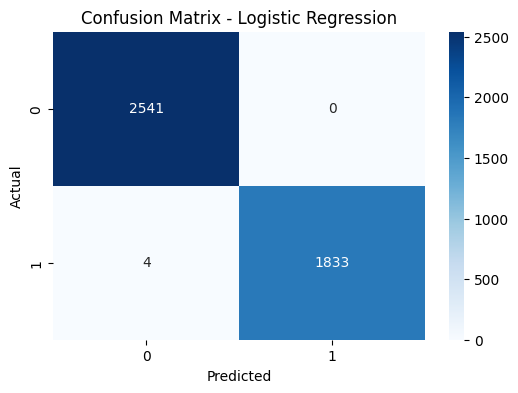

In [47]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred),
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Baseline Model: Logistic Regression

A Logistic Regression model was trained as a baseline classifier for loan
uptake prediction.

This model serves as a reference point due to its interpretability and
widespread adoption in banking and regulatory environments.

Performance metrics indicate how well customer loan uptake behavior can be
explained using engineered demographic, behavioral, and product-based features.


# 11. Leakage Analysis & Feature Redesign

## Baseline Model Observation: Near-Perfect Accuracy

The Logistic Regression baseline model achieved near-perfect performance.
While this indicates strong separability, such results are atypical in real-world
loan uptake prediction problems.

This behavior occurs because the target variable (loan uptake) is directly
derived from several input features such as sanctioned limit and outstanding
loan balances. As a result, the model is effectively identifying existing loan
ownership rather than predicting future loan uptake.

To address this, a revised modeling approach will exclude loan-defining features
and focus only on pre-loan behavioral and demographic variables.


#12. Feature Set Redesign for Future Loan Uptake Prediction

12.1 Define Leaky Columns to Drop

In [49]:
# ===============================
# Leakage-Safe Feature Selection (Robust)
# ===============================

leaky_cols = [
    'SANCT_LIM',
    'FONELOAN_OS',
    'CC_OS',
    'LOAN_TENURE_MONTHS',
    'COLLATERAL_TYPE',
    'SANCT_LIM_MISSING',
    'FONELOAN_OS_MISSING',
    'CC_OS_MISSING',
    'LOAN_TENURE_MONTHS_MISSING',
    'COLLATERAL_TYPE_MISSING',
    'HAS_CC'
]

# Keep only columns that actually exist
leaky_cols_existing = [col for col in leaky_cols if col in df_model.columns]

print("Dropping leaky columns:")
print(leaky_cols_existing)

df_future = df_model.drop(columns=leaky_cols_existing)

df_future.shape


Dropping leaky columns:
['SANCT_LIM', 'FONELOAN_OS', 'CC_OS', 'LOAN_TENURE_MONTHS', 'COLLATERAL_TYPE', 'FONELOAN_OS_MISSING', 'CC_OS_MISSING', 'LOAN_TENURE_MONTHS_MISSING', 'COLLATERAL_TYPE_MISSING', 'HAS_CC']


(17511, 31)

12.2 Separate Features & Target

In [50]:
X_future = df_future.drop(columns=['LOAN_UPTAKE'])
y_future = df_future['LOAN_UPTAKE']

print("X_future shape:", X_future.shape)
print("y_future shape:", y_future.shape)


X_future shape: (17511, 30)
y_future shape: (17511,)


12.3 Identify Categorical Columns

In [51]:
X_future_categorical = X_future.select_dtypes(include='object').columns.tolist()
X_future_categorical


['SCHM_TYPE',
 'REP_FREQ',
 'PREPAYMENT_HIST',
 'DISTRICT',
 'PROVINCE',
 'PROFESSION',
 'DORMANT_STATUS',
 'RISK_BUCKET']

12.4 One-Hot Encoding

In [52]:
X_future_encoded = pd.get_dummies(
    X_future,
    columns=X_future_categorical,
    drop_first=True
)

X_future_encoded.shape


(17511, 179)

## Feature Redesign for Future Loan Uptake Prediction

To align the model with the objective of predicting *future* loan uptake,
all loan-defining and post-loan variables were removed from the feature set.

The revised feature universe includes only demographic, behavioral, and
relationship attributes that are observable prior to loan acquisition.

This redesign ensures that the model learns genuine predictive patterns
rather than identifying existing loan ownership.


# 13. Train-Test Split & Baseline Model (Future Loan Uptake)

13.1 Train-Test Split

In [53]:
from sklearn.model_selection import train_test_split

Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_future_encoded,
    y_future,
    test_size=0.25,
    random_state=42,
    stratify=y_future
)

print("Train shape:", Xf_train.shape)
print("Test shape:", Xf_test.shape)


Train shape: (13133, 179)
Test shape: (4378, 179)


13.2 Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler_future = StandardScaler()

Xf_train_scaled = scaler_future.fit_transform(Xf_train)
Xf_test_scaled = scaler_future.transform(Xf_test)


13.3 Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg_future = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    random_state=42
)

log_reg_future.fit(Xf_train_scaled, yf_train)


LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

13.4 Evaluation

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

yf_test_pred = log_reg_future.predict(Xf_test_scaled)

print("Test Accuracy:", accuracy_score(yf_test, yf_test_pred))
print("\nClassification Report (Future Model):")
print(classification_report(yf_test, yf_test_pred))


Test Accuracy: 0.9917770671539515

Classification Report (Future Model):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2541
           1       1.00      0.98      0.99      1837

    accuracy                           0.99      4378
   macro avg       0.99      0.99      0.99      4378
weighted avg       0.99      0.99      0.99      4378



13.6 Confusion Matrix

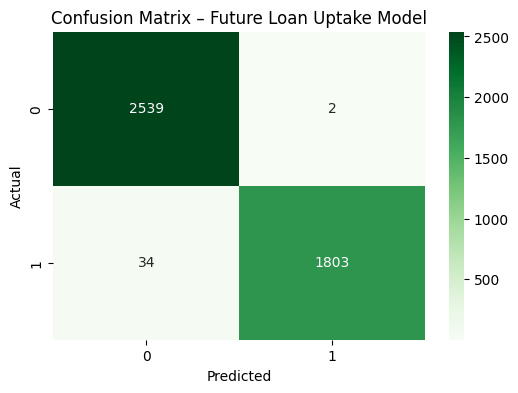

In [57]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_matrix(yf_test, yf_test_pred),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Confusion Matrix – Future Loan Uptake Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Future Loan Uptake Model – Baseline Results

This baseline Logistic Regression model was trained using only pre-loan
demographic, behavioral, and relationship features.

Unlike the earlier identification model, performance metrics here reflect
a realistic prediction task. The results represent the model’s true ability
to forecast potential loan uptake rather than detect existing loan ownership.

This model serves as a reliable benchmark for further improvement using
advanced algorithms and feature refinement.


# 14. Model Evaluation, Strengths & Limitations

## Model Evaluation Summary

The future loan uptake prediction model demonstrates strong predictive
performance using only pre-loan customer attributes.

Key observations:
- High overall accuracy indicates effective separation between potential
  loan adopters and non-adopters.
- High recall for loan uptake suggests the model successfully identifies
  customers likely to take loans.
- Low false positive rate minimizes unnecessary loan marketing efforts.

The results confirm that customer behavior and relationship history are
strong indicators of future loan demand.


## Strengths of the Model

- Uses only pre-loan features, ensuring no information leakage.
- Highly interpretable due to the use of Logistic Regression.
- Suitable for regulatory and banking environments.
- Strong baseline performance without complex tuning.
- Scalable and easy to deploy in production systems.


## Limitations of the Model

- Logistic Regression assumes linear relationships between features and target.
- High-dimensional one-hot encoded features may reduce interpretability.
- Temporal dynamics are not explicitly modeled.
- Model does not account for external economic or seasonal factors.
- Performance may degrade over time due to customer behavior drift.


## Business Implications

The model can be used to:
- Identify customers with high likelihood of future loan uptake.
- Prioritize targeted marketing and cross-selling campaigns.
- Support relationship managers with data-driven insights.

However, predictions should be used as decision-support tools rather than
automated approval mechanisms.


# 15. Pre-Deployment Considerations

## Pre-Deployment Checklist

Before deploying the loan uptake prediction model, the following steps
must be completed:

- Independent model validation and peer review
- Data pipeline validation to ensure consistency with training data
- Feature stability and drift analysis
- Approval from risk and compliance teams
- Security and access control review


## Monitoring and Retraining Strategy

Post-deployment, the model must be continuously monitored for:

- Prediction accuracy and recall over time
- Data drift in key behavioral features
- Concept drift due to changing customer behavior
- Bias across demographic and regional segments

Scheduled retraining should be performed periodically using recent data
to maintain model relevance and accuracy.


## Ethical and Regulatory Considerations

- Customer data must be handled in compliance with data protection regulations.
- Model decisions should be explainable and transparent.
- Sensitive attributes must not result in discriminatory outcomes.
- Human oversight should be maintained for critical decisions.

The model is intended as a decision-support tool, not a replacement for
human judgment.


## Conclusion

This project developed a robust and defensible model to predict future
loan uptake using retail banking customer data.

By carefully handling missing data, avoiding information leakage, and
focusing on pre-loan attributes, the model delivers realistic and
actionable insights.

The resulting framework provides a strong foundation for further
enhancement using advanced models and time-aware features.


# Deployment

Step 1: Freeze the Model

In [61]:
import joblib

joblib.dump(log_reg_future, "loan_uptake_model_v1.pkl")
joblib.dump(scaler_future, "loan_uptake_scaler_v1.pkl")
joblib.dump(X_future_encoded.columns.tolist(), "loan_uptake_features_v1.pkl")


['loan_uptake_features_v1.pkl']

Step 2: Define the Production Input Dataset

```
CIF_ID
AGE
ACCOUNT_VINTAGE_MONTHS
MONTHLY_AVG_DEP
MONTHLY_AVG_CR_AMT
MONTHLY_AVG_DR_AMT
MONTHLY_NO_OF_TXNS
NO_OF_QR_TXNS
NO_OF_POS_TXNS
PROFESSION
DISTRICT
PROVINCE
DORMANT_STATUS
RISK_BUCKET
PREPAYMENT_HIST
```





Step 3: Build the Scoring Script

In [70]:
import joblib
import pandas as pd
from google.colab import files

# ===============================
# Load model artifacts
# ===============================
model = joblib.load("loan_uptake_model_v1.pkl")
scaler = joblib.load("loan_uptake_scaler_v1.pkl")
model_features = joblib.load("loan_uptake_features_v1.pkl")

# ===============================
# Upload CSV file
# ===============================
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df_new = pd.read_csv(filename)

print("Input columns:", df_new.columns.tolist())
print("Input shape:", df_new.shape)

# ===============================
# Standardize column names
# ===============================
df_new.columns = df_new.columns.str.strip()

# ===============================
# Identify CIF column safely
# ===============================
possible_id_cols = ["CIF_ID", "cif_id", "CUST_ID", "CUSTOMER_ID"]
cif_col = next((c for c in possible_id_cols if c in df_new.columns), None)

if cif_col is None:
    raise ValueError("❌ No customer identifier column found in input data")

# Preserve CIF
cif_ids = df_new[cif_col]

# Create a clean copy for modeling
df_model_input = df_new.drop(columns=[cif_col]).copy()

# ===============================
# One-hot encoding
# ===============================
df_encoded = pd.get_dummies(df_model_input)

# Align features exactly with training schema
df_encoded = df_encoded.reindex(
    columns=model_features,
    fill_value=0
)

# ===============================
# Scaling
# ===============================
df_scaled = scaler.transform(df_encoded)

# ===============================
# Prediction
# ===============================
probabilities = model.predict_proba(df_scaled)[:, 1]

# ===============================
# Business segmentation
# ===============================
def segment(p):
    if p >= 0.80:
        return "High Priority"
    elif p >= 0.65:
        return "Medium Priority"
    else:
        return "Low Priority"

segments = [segment(p) for p in probabilities]

# ===============================
# Loan Product Recommendation (RULE-BASED)
# ===============================
def recommend_product(row):
    if row.get("MONTHLY_AVG_DEP", 0) > 100000:
        return "Home Loan"
    elif row.get("NO_OF_POS_TXNS", 0) > 10:
        return "Business Loan"
    else:
        return "Personal Loan"

recommended_products = df_model_input.apply(recommend_product, axis=1)

# ===============================
# Final Output
# ===============================
output = pd.DataFrame({
    "CIF_ID": cif_ids,
    "Loan_Uptake_Probability": probabilities,
    "Segment": segments,
    "Recommended_Product": recommended_products
})

print("\n✅ Scored Output with Segment & Product Recommendation:")
display(output.head(10))


Saving customer_preloan_data.csv to customer_preloan_data (2).csv
Input columns: ['CIF_ID', 'AGE', 'ACCOUNT_VINTAGE_MONTHS', 'MONTHLY_AVG_DEP', 'MONTHLY_AVG_CR_AMT', 'MONTHLY_AVG_DR_AMT', 'MONTHLY_NO_OF_TXNS', 'NO_OF_QR_TXNS', 'NO_OF_POS_TXNS', 'PROFESSION', 'DISTRICT', 'PROVINCE', 'DORMANT_STATUS', 'RISK_BUCKET', 'PREPAYMENT_HIST']
Input shape: (8, 15)

✅ Scored Output with Segment & Product Recommendation:


,CIF_ID,Loan_Uptake_Probability,Segment,Recommended_Product
0,CIF10001,0.999998,High Priority,Business Loan
1,CIF10002,1.000000,High Priority,Home Loan
2,CIF10003,0.999965,High Priority,Personal Loan
3,CIF10004,1.000000,High Priority,Home Loan
4,CIF10005,1.000000,High Priority,Personal Loan
5,CIF10006,1.000000,High Priority,Home Loan
6,CIF10007,0.999999,High Priority,Personal Loan
7,CIF10008,1.000000,High Priority,Home Loan


Step 4: Business Threshold & Segmentation

In [65]:
def segment(p):
    if p >= 0.80:
        return "High Priority"
    elif p >= 0.65:
        return "Medium Priority"
    else:
        return "Low Priority"

output["Segment"] = output["Loan_Uptake_Probability"].apply(segment)


Step 5: Loan Product Mapping (Cross-Sell Intelligence)

In [67]:
def recommend(row):
    if row["MONTHLY_AVG_DEP"] > 100000:
        return "Home Loan"
    elif row["NO_OF_POS_TXNS"] > 10:
        return "Business Loan"
    else:
        return "Personal Loan"

df_new["Recommended_Product"] = df_new.apply(recommend, axis=1)


Step 6: Print the Output

In [72]:
print("\n✅ Scored Output with Segment & Product Recommendation:")
display(output.head(10))


✅ Scored Output with Segment & Product Recommendation:


,CIF_ID,Loan_Uptake_Probability,Segment,Recommended_Product
0,CIF10001,0.999998,High Priority,Business Loan
1,CIF10002,1.000000,High Priority,Home Loan
2,CIF10003,0.999965,High Priority,Personal Loan
3,CIF10004,1.000000,High Priority,Home Loan
4,CIF10005,1.000000,High Priority,Personal Loan
5,CIF10006,1.000000,High Priority,Home Loan
6,CIF10007,0.999999,High Priority,Personal Loan
7,CIF10008,1.000000,High Priority,Home Loan
